In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats, optimize

def r_squared(func, xdata, ydata):
    rss = np.sum((ydata - func(xdata)) ** 2)
    tss = np.sum((ydata - np.mean(ydata)) ** 2)
    print(f'rss / tss {rss}/{tss}')
    return 1 - rss / tss

def std_error(func, xdata, ydata):
    return np.std(ydata - func(xdata))

def log_lin_regress(x, y, name=''):
        """
        Perform log linear least squares regression and return fitted log function
        and paramateres where function is the form:
            y = a * e ^ (b * x)
        """
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, np.log(y))
        intercept = np.e ** intercept
        y_reg = lambda x : intercept * np.e ** (slope * x)
        print(f"""
        Regression Name:{name}
        slope:{slope}
        intercept:{intercept}
        AUC:{intercept / slope}
        r_value:{r_squared(y_reg, x, y)}
        std_err:{std_error(y_reg, x, y)}
        """)
        return (y_reg, intercept, slope)

    
def lin_regress(x, y, name=''):
        """
        Perform linear least squares regression and return fitted linear function
        and paramateres where function is the form:
            y = m * x + c
        """
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        y_reg = lambda x : slope * x + intercept
        print(f"""
        Regression Name:{name}
        slope:{slope}
        intercept:{intercept}
        r_value:{r_value}
        p_value:{p_value}
        std_err:{std_err}
        """)
        return (y_reg, intercept, slope)
    
def fit(func, xdata, ydata):
    popt, _ = optimize.curve_fit(func, xdata, ydata)
    f = lambda x: func(x, *popt)
    
    r2 = r_squared(f, xdata, ydata)
    std = std_error(f, xdata, ydata)
    
    print(f"""
    intercept: {popt[0]}
    slope: {popt[1]}
    AUC:{popt[0] / popt[1]}
    r2: {r2}
    std error: {std}
    """)
    return f, popt, r2, std
    

In [112]:
data = pd.read_csv('../data.csv')

w = data['Week'].values.astype(float)
hh = data['HH'].values.astype(float)
he = data['HE'].values.astype(float)
lh = data['LH'].values.astype(float)
le = data['LE'].values.astype(float)
total = data['Total'].values.astype(float)

print(data)

    Week  HH  LH  HE  LE  Total
0      1  10   5   8  25     48
1      2   7  10   6  19     42
2      3   6   5   5  16     32
3      4   7   4   8   8     27
4      5   2   5   2  14     23
5      6   3   3   1  16     23
6      7   1   2   1  15     19
7      8   3   1   3   9     16
8      9   1   4   1   7     13
9     10   0   2   3   5     10
10    11   1   1   1   5      8
11    12   1   1   4   3      9
12    13   2   0   3   2      7
13    14   2   1   2   2      7
14    15   1   1   0   1      3
15    16   0   0   1   1      2
16    17   2   2   0   0      4
17    18   0   1   0   1      2
18    19   1   2   0   1      4
19    20   0   0   1   0      1


In [113]:
    legend_text = ('Major hard',
                   'Major easy',
                   'Minor hard',
                   'Minor easy')

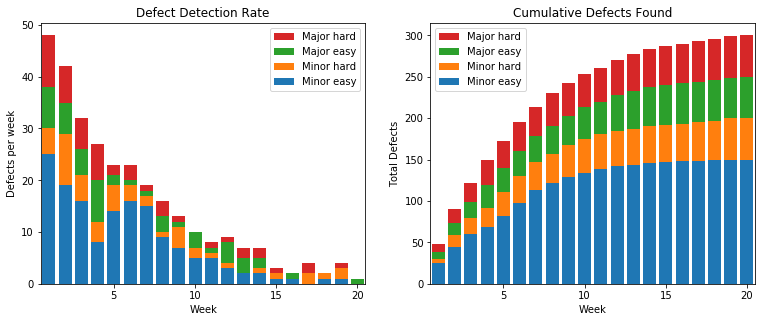

In [73]:
"""
 Data Histogram Plots
"""

def histograms(x, hh, he, lh, le, cumulative=False):
    fig = plt.figure(
        figsize=(12.8, 4.8)
    )
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    def stacked_histogram_rate(ax, x, hh, he, lh, le):
        p1 = ax.bar(w, le)
        p2 = ax.bar(w, lh, bottom=le)
        p3 = ax.bar(w, he, bottom=le+lh)
        p4 = ax.bar(w, hh, bottom=le+lh+he)

        ax.title.set_text('Defect Detection Rate')
        ax.set_ylabel('Defects per week')
        ax.set_xlabel('Week')
        ax.legend((p4[0], p3[0], p2[0], p1[0]), legend_text)
        ax.set_xticks([5,10,15,20])
        ax.set_xlim((0.5,20.5))
    
    
    def stacked_histogram_total(ax, x, hh, he, lh, le):
        def cumulative_totals(xs):
            def accumulate(x):
                cx = [x[0]]
                for i in range(1, len(x)):
                    cx.append(cx[i-1] + x[i])
                return np.array(cx)
            results = []
            for x in xs: 
                results.append(accumulate(x))
            return results

        hh, he, lh, le = cumulative_totals([hh, he, lh, le])

        p1 = ax.bar(w, le)
        p2 = ax.bar(w, lh, bottom=le)
        p3 = ax.bar(w, he, bottom=le+lh)
        p4 = ax.bar(w, hh, bottom=le+lh+he)

        ax.title.set_text('Cumulative Defects Found')
        ax.set_ylabel('Total Defects')
        ax.set_xlabel('Week')
        ax.legend((p4[0], p3[0], p2[0], p1[0]), legend_text)
        ax.set_xticks([5,10,15,20])
        ax.set_xlim((0.5,20.5))
    
    
    stacked_histogram_rate(ax1, x, hh, he, lh, le)
    stacked_histogram_total(ax2, x, hh, he, lh, le)

    
histograms(w, hh, he, lh, le)

rss / tss 50.92939448312602/139.8

        Regression Name:
        slope:-0.12419383513918719
        intercept:6.130061244503282
        AUC:-49.35882073078077
        r_value:0.635698179662904
        std_err:1.5232780022144372
        
rss / tss 49.90947018937626/111.80000000000001

        Regression Name:
        slope:-0.11901193584581087
        intercept:6.003971656150185
        AUC:-50.44848328430514
        r_value:0.5535825564456507
        std_err:1.515885750386735
        
rss / tss 41.584236931617134/106.1375

        Regression Name:
        slope:-0.11477277170198782
        intercept:5.988712538952114
        AUC:-52.17886132873091
        r_value:0.6082041038123459
        std_err:1.3960573243395682
        
rss / tss 201.9840780194785/1044.45

        Regression Name:
        slope:-0.21065106376424275
        intercept:36.292800111656184
        AUC:-172.2887103588259
        r_value:0.8066120177897664
        std_err:3.177053483991545
        


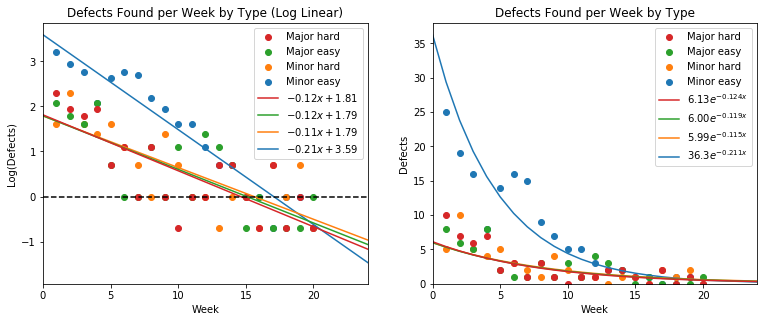

In [132]:
"""
    Model 1: By Defect Type Log Linear
"""

def log_linear_type(x, hh, he, lh, le):
    fig = plt.figure(
        figsize=(12.8, 4.8)
    )
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    
    # Fix data for ll plots
    def replace_zeros(array):
        array = list(array)
        nil = 0.5
        for i in range(len(array)):
            if array[i] == 0:
                array[i] = nil
        return array
        
    hh0 = replace_zeros(hh)
    he0 = replace_zeros(he)
    lh0 = replace_zeros(lh)
    le0 = replace_zeros(le)

    hhr, hhi, hhs = log_lin_regress(x, hh0)
    her, hei, hes = log_lin_regress(x, he0)
    lhr, lhi, lhs = log_lin_regress(x, lh0)
    ler, lei, les= log_lin_regress(x, le0)
    
    x_reg = np.append([0], np.append(x, [25])) # Extend regression line beyon graph bounds

    def linear_plot(ax):
        r4 = ax.plot(x_reg, np.log(ler(x_reg)))
        p4 = ax.scatter(x, np.log(le0))
        r3 = ax.plot(x_reg, np.log(lhr(x_reg)))
        p3 = ax.scatter(x, np.log(lh0))
        r2 = ax.plot(x_reg, np.log(her(x_reg)))
        p2 = ax.scatter(x, np.log(he0))
        r1 = ax.plot(x_reg, np.log(hhr(x_reg)))
        p1 = ax.scatter(x, np.log(hh0))
        ax.plot([0,25],[0,0], color='black', linestyle='dashed')
        
        ax.legend((p1, p2, p3, p4, r1[0], r2[0], r3[0], r4[0]),
                  legend_text + 
                  ('$-0.12x + 1.81$',
                   '$-0.12x + 1.79$',
                   '$-0.11x + 1.79$',
                   '$-0.21x + 3.59$')
        )
        ax.title.set_text('Defects Found per Week by Type (Log Linear)')
        ax.set_ylabel('Log(Defects)')
        ax.set_xlabel('Week')
        ax.set_xticks([0, 5,10,15,20])
        ax.set_xlim((0,24))
        
    def log_plot(ax):
        r4 = ax.plot(x_reg, ler(x_reg))
        p4 = ax.scatter(x, le)
        r3 = ax.plot(x_reg, lhr(x_reg))
        p3 = ax.scatter(x, lh)
        r2 = ax.plot(x_reg, her(x_reg))
        p2 = ax.scatter(x, he)
        r1 = ax.plot(x_reg, hhr(x_reg))
        p1 = ax.scatter(x, hh)
        
        
        ax.legend((p1, p2, p3, p4, r1[0], r2[0], r3[0], r4[0]),
                  legend_text + 
                  ('$6.13 e^ {-0.124 x}$',
                   '$6.00 e^ {-0.119 x}$',
                   '$5.99 e^ {-0.115 x}$',
                   '$36.3 e^ {-0.211 x}$')
        )
        ax.title.set_text('Defects Found per Week by Type')
        ax.set_ylabel('Defects')
        ax.set_xlabel('Week')
        ax.set_xticks([0, 5,10,15,20])
        ax.set_xlim((0,24))
        ax.set_ylim((0,38))
        
    linear_plot(ax1)    
    log_plot(ax2)
    
log_linear_type(w, hh, he, lh, le)
# AUC: https://www.wolframalpha.com/input/?i=36.29*e%5E%28-0.21065x%29+%2B+5.988*e%5E%28-.1148x%29+%2B+6.004*e%5E%28-.119x%29+%2B+6.13*e%5E%28-.1242x%29+integrate+0+to+1000

rss / tss 61.0645352772634/3558.0

        Regression Name:
        slope:-0.1786362776533267
        intercept:60.84196130102284
        AUC:-340.59129590181425
        r_value:0.9828373987416348
        std_err:1.7434243627372408
        


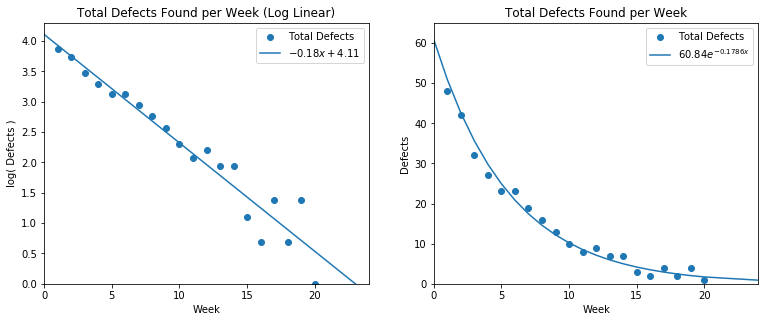

In [78]:
"""
Model 2: Total Defects Log Linear
"""

def log_linear_total(x, y, offset=None):
    fig = plt.figure(
        figsize=(12.8, 4.8)
    )
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    # Apply offset
    if offset:
        x = np.array([element + offset for element in x])
    

    y_reg, intercept, slope = log_lin_regress(x, y) # Perform linear regression
    x_reg = np.append([0], np.append(x, [25])) # Extend regression line beyon graph bounds
    
    def plot1(ax):
        r1 = ax.plot(x_reg, np.log(y_reg(x_reg)))
        p1 = ax.scatter(x, np.log(y))
        # Graph labels
        ax.title.set_text('Total Defects Found per Week (Log Linear)')
        ax.set_ylabel('log( Defects )')
        ax.set_xlabel('Week')
        ax.legend((p1, r1[0]), ('Total Defects', '$-0.179x + 4.11$'))
        ax.set_xticks([0, 5,10,15,20])
        ax.set_xlim((0,24))
        ax.set_ylim((0,4.3))
    plot1(ax1)
    
    def plot2(ax):
        r1 = ax.plot(x_reg, y_reg(x_reg))
        p1 = ax.scatter(x, y)
        # Graph labels
        ax.title.set_text('Total Defects Found per Week')
        ax.set_ylabel('Defects')
        ax.set_xlabel('Week')
        ax.legend((p1, r1[0]), ('Total Defects', '$60.8e^{-0.179x}$'))
        ax.set_xticks([0, 5,10,15,20])
        ax.set_xlim((0,24))
        ax.set_ylim((0,65))
        
    plot2(ax2)
log_linear_total(w, total, offset=-0.)

rss / tss 39.157845440610686/3558.0

    intercept: 51.6792973562596
    slope: -0.16555078657695727
    AUC:-312.16582188956363
    r2: 0.9889944223044939
    std error: 1.3990779152733088
    


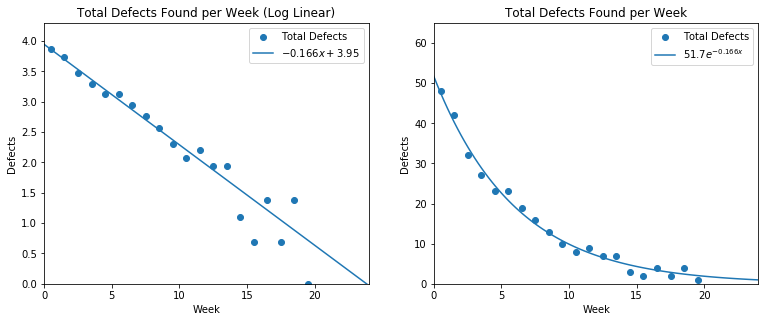

In [133]:
"""
Model 3: Total Defects Non-linear Regression
"""

def log_total(x, y, offset=None):
    fig = plt.figure(
        figsize=(12.8, 4.8)
    )
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    # Apply offset
    if offset:
        x = np.array([element + offset for element in x])

    f = lambda x, a, b: a * np.e ** (b * x)
    y_reg, popt, r2, std = fit(f, x, y)

    x_reg = np.linspace(0,25,100) # Extend regression line beyond graph bounds
    
    def plot_lin(ax):
        r1 = ax.plot(x_reg, np.log(y_reg(x_reg)))
        p1 = ax.scatter(x, np.log(y))
        # Graph labels
        ax.title.set_text('Total Defects Found per Week (Log Linear)')
        ax.set_ylabel('Defects')
        ax.set_xlabel('Week')
        ax.legend((p1, r1[0]), ('Total Defects', '$-0.166x + 3.95$'))
        ax.set_xticks([0, 5,10,15,20])
        ax.set_xlim((0,24))
        ax.set_ylim((0,4.3))
    
    def plot_log(ax):
        r1 = ax.plot(x_reg, y_reg(x_reg))
        p1 = ax.scatter(x, y)
        # Graph labels
        ax.title.set_text('Total Defects Found per Week')
        ax.set_ylabel('Defects')
        ax.set_xlabel('Week')
        ax.legend((p1, r1[0]), ('Total Defects', '$51.7e^{-0.166x}$'))
        ax.set_xticks([0, 5,10,15,20])
        ax.set_xlim((0,24))
        ax.set_ylim((0,65))
    
    plot_lin(ax1)
    plot_log(ax2)

log_total(w, total, offset = -0.5)



In [138]:
import sim

# Strategy 1
s1 = sim.DefectSim()
for i in range(500):
    s1.tick(1)

# Strategy 2
s2 = sim.DefectSim()
for i in range(500):
    s2.tick(2)

s3 = sim.DefectSim()
for i in range(500):
    s3.tick(3)

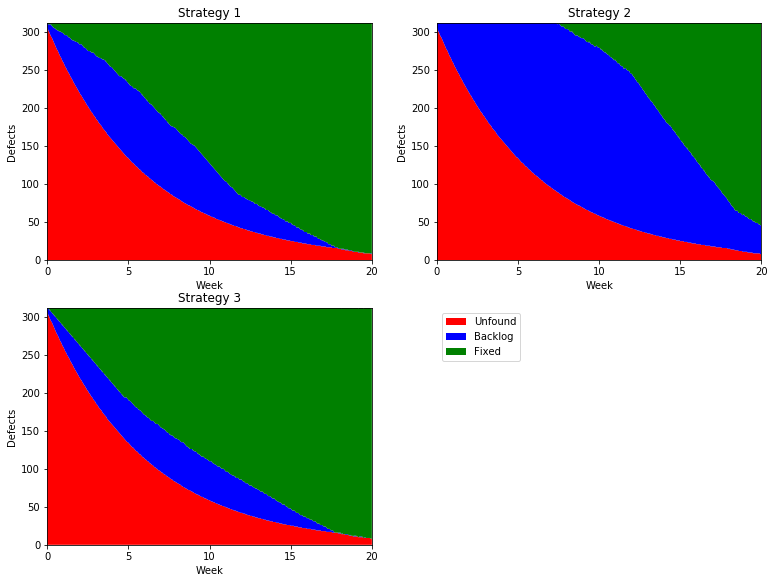

In [102]:
# Simulated unfound, backlog, fixed histogram
def simulation_histograms(x, s1, s2, s3):
    fig = plt.figure(
        figsize=(12.8, 9.6)
    )
    ax0 = fig.add_subplot(224)
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    
    
    bottom = np.zeros(500)
    top = np.array([312]*500)
    
    x = np.linspace(0, 20, 500)
    xs = np.concatenate((x, x[::-1]))
    
    def strat_hist(ax, x, u, b, f, title='aaa'):
        lower = np.concatenate((u, bottom))
        middle = np.concatenate((u + b, u[::-1]))
        upper = np.concatenate((u + b + f, u[::-1] + b[::-1]))
        
        p1 = ax.fill(x, lower, 'r')
        p2 = ax.fill(x, middle, 'b')
        p3 = ax.fill(x, upper, 'g')

        ax.title.set_text(title)
        ax.set_ylabel('Defects')
        ax.set_xlabel('Week')
        
        ax.set_ylim([0, 312])
        ax.set_xlim((0, 20))
        ax.set_xticks([0,5,10,15,20])
        ax0.legend((p1[0], p2[0], p3[0]), ('Unfound', 'Backlog', 'Fixed'), loc=2)
    strat_hist(ax1, xs, *s1, 'Strategy 1')
    strat_hist(ax2, xs, *s2, 'Strategy 2')
    strat_hist(ax3, xs, *s3, 'Strategy 3')
    
    ax0.spines['top'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.spines['left'].set_visible(False)
    ax0.set_xticks([])
    ax0.set_yticks([])

    
x = np.linspace(1,500,500)    
s1_b = np.array(s1.backlog_hist['total'])
s1_f = np.array(s1.fixed_hist['total'])
s1_u = 312 - s1_b - s1_f
s2_b = np.array(s2.backlog_hist['total'])
s2_f = np.array(s2.fixed_hist['total'])
s2_u = 312 - s1_b - s1_f
s3_b = np.array(s3.backlog_hist['total'])
s3_f = np.array(s3.fixed_hist['total'])
s3_u = 312 - s1_b - s1_f
simulation_histograms(x, (s1_u, s1_b, s1_f), (s2_u, s2_b, s2_f), (s3_u, s3_b, s3_f))


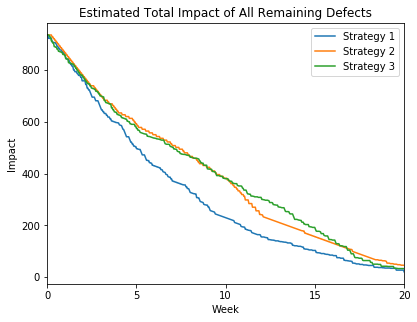

In [109]:
# Total Remaining bugs impact
def impact_plot(x, s1, s2, s3):
    fig = plt.figure(
        figsize=(6.4, 4.8)
    )
    ax = fig.add_subplot(111)
    
    p1 = ax.plot(x, s1)
    p2 = ax.plot(x, s2)
    p3 = ax.plot(x, s3)

    ax.title.set_text('Estimated Total Impact of All Remaining Defects')
    ax.set_ylabel('Impact')
    ax.set_xlabel('Week')
    ax.legend((p1[0], p2[0], p3[0]), ('Strategy 1', 'Strategy 2', 'Strategy 3'))
    ax.set_xticks([0, 5,10,15,20])
    ax.set_xlim((0,20))

x = np.linspace(0,20,500)
y1 = s1.total_impact_hist
y2 = s2.total_impact_hist
y3 = s3.total_impact_hist

impact_plot(x, y1, y2, y3)

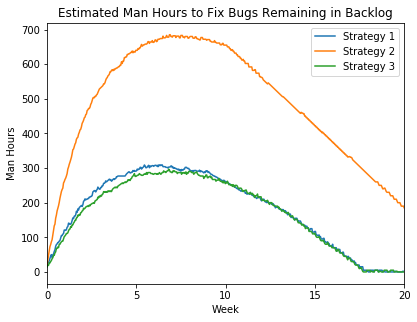

In [107]:
# Time to fix backlog
def time_to_fix_plot(x, s1, s2, s3):
    fig = plt.figure(
        figsize=(6.4, 4.8)
    )
    ax = fig.add_subplot(111)
    
    p1 = ax.plot(x, s1)
    p2 = ax.plot(x, s2)
    p3 = ax.plot(x, s3)

    ax.title.set_text('Estimated Man Hours to Fix Bugs Remaining in Backlog')
    ax.set_ylabel('Man Hours')
    ax.set_xlabel('Week')
    ax.legend((p1[0], p2[0], p3[0]), ('Strategy 1', 'Strategy 2', 'Strategy 3'))
    ax.set_xticks([0, 5,10,15,20])
    ax.set_xlim((0,20))

x = np.linspace(0,20,500)
y1 = s1.time_to_fix_hist
y2 = s2.time_to_fix_hist
y3 = s3.time_to_fix_hist

time_to_fix_plot(x, y1, y2, y3)

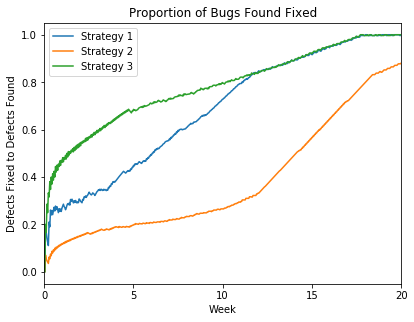

In [108]:
# Bugs fixed to bugs found ratio
def fix_found_ratio_plot(x, s1, s2, s3):
    fig = plt.figure(
        figsize=(6.4, 4.8)
    )
    ax = fig.add_subplot(111)
    
    p1 = ax.plot(x, s1)
    p2 = ax.plot(x, s2)
    p3 = ax.plot(x, s3)

    ax.title.set_text('Proportion of Bugs Found Fixed')
    ax.set_ylabel('Defects Fixed to Defects Found')
    ax.set_xlabel('Week')
    ax.legend((p1[0], p2[0], p3[0]), ('Strategy 1', 'Strategy 2', 'Strategy 3'))
    ax.set_xticks([0, 5,10,15,20])
    ax.set_xlim((0,20))

x = np.linspace(0,20,500)
y1 = s1.found_fixed_ratio_hist
y2 = s2.found_fixed_ratio_hist
y3 = s3.found_fixed_ratio_hist

fix_found_ratio_plot(x, y1, y2, y3)